<a href="https://colab.research.google.com/github/vikram2727/Time-series-Forcasting/blob/main/AI%2BMA_%3D_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,7

In [ ]:
# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.offsetbox import AnchoredText
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)
plt.style.use("seaborn-white")
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
A = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2015.csv')
B = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2016.csv')
C = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2017.csv')
D = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2018.csv')
E = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2019.csv')
F = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2020.csv')
g = pd.read_csv('/content/drive/MyDrive/Nifty_MIdCap_100/2021.csv')

df = pd.concat([A, B, C, D, E, F ,g])
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,09-Nov-2015,12747.95,13111.90,12712.15,13073.80,217157317,3143.21
1,10-Nov-2015,13058.05,13091.35,12840.30,12851.25,245104303,3354.65
2,11-Nov-2015,12959.70,12996.85,12959.70,12991.45,38423317,430.38
3,13-Nov-2015,12922.65,12931.05,12818.55,12885.95,195940544,3453.01
4,16-Nov-2015,12862.95,12917.30,12809.50,12883.85,190432089,2948.63
...,...,...,...,...,...,...,...
105,08-Jun-2021,26997.65,27091.60,26717.90,27042.80,925085885,17699.91
106,09-Jun-2021,27199.40,27373.70,26679.55,26847.80,1411436488,23507.46
107,10-Jun-2021,27055.90,27294.10,27022.70,27268.45,879533118,17651.95
108,11-Jun-2021,27424.25,27474.45,27207.40,27329.15,850549160,16011.74


In [ ]:
## Cleaning up the data
col = ['Date','Close']
df = df[col] 
df.head()

,Date,Close
0,09-Nov-2015,13073.80
1,10-Nov-2015,12851.25
2,11-Nov-2015,12991.45
3,13-Nov-2015,12885.95
4,16-Nov-2015,12883.85


In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.set_index(['Date'])
df.head()

,Close
Date,
2015-11-09,13073.80
2015-11-10,12851.25
2015-11-11,12991.45
2015-11-13,12885.95
2015-11-16,12883.85


In [ ]:
#df.set_index('Date',inplace=True)  # other method
df

,Close
Date,
2015-11-09,13073.80
2015-11-10,12851.25
2015-11-11,12991.45
2015-11-13,12885.95
2015-11-16,12883.85
...,...
2021-06-08,27042.80
2021-06-09,26847.80
2021-06-10,27268.45


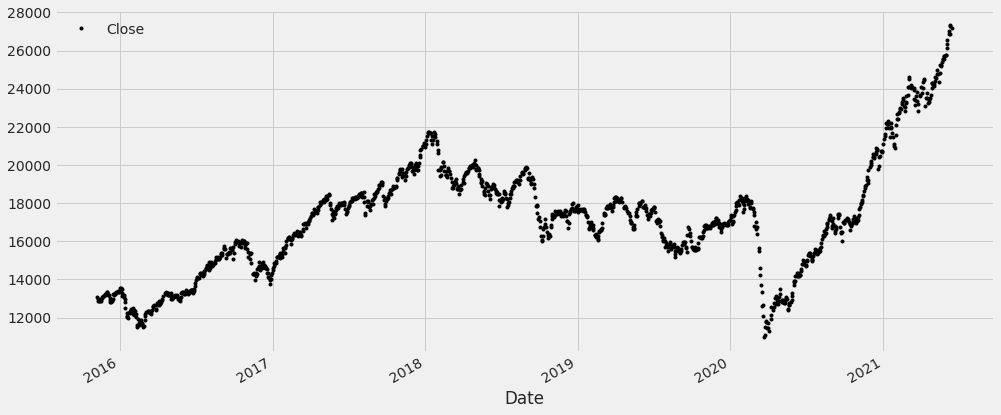

In [ ]:
df.plot(style = 'k.')

In [ ]:
#check the stanaritay
# test 1 rolling mean

#determining the rolling statistics 
rolmean = df.rolling(window=90).mean()

rolstd = df.rolling(window=90).std()

print(rolmean,rolstd)

              Close
Date               
2015-11-09      nan
2015-11-10      nan
2015-11-11      nan
2015-11-13      nan
2015-11-16      nan
...             ...
2021-06-08 23942.62
2021-06-09 24002.53
2021-06-10 24070.90
2021-06-11 24141.34
2021-06-14 24211.21

[1383 rows x 1 columns]              Close
Date              
2015-11-09     nan
2015-11-10     nan
2015-11-11     nan
2015-11-13     nan
2015-11-16     nan
...            ...
2021-06-08 1228.71
2021-06-09 1237.50
2021-06-10 1246.14
2021-06-11 1249.19
2021-06-14 1242.27

[1383 rows x 1 columns]


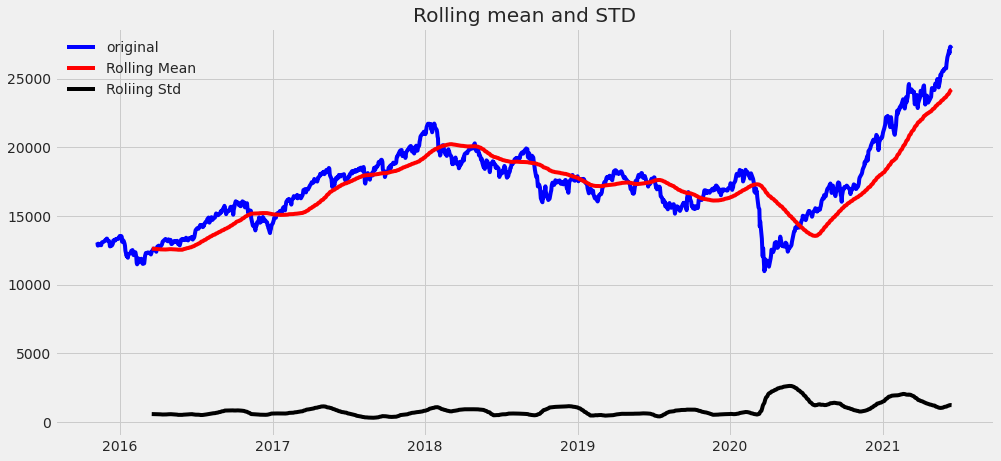

In [ ]:
#plot 

original = plt.plot(df, color= 'blue',label = "original")
mean = plt.plot(rolmean,color= 'red',label='Rolling Mean')
std  = plt.plot(rolstd, color='black',label ='Roliing Std')

plt.legend(loc = 'best')
plt.title('Rolling mean and STD')
plt.show(block= False)

In [ ]:
# again the mean and std are not constant so the data is not statinary

In [ ]:
#2 Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('results of the Dickey-fuller test:')

dftest = adfuller(df['Close'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Obeservation used'])

for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print(dfoutput)

results of the Dickey-fuller test:
Test Statistic                  -0.21
p-value                          0.94
#Lags Used                      14.00
Number of Obeservation used   1368.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


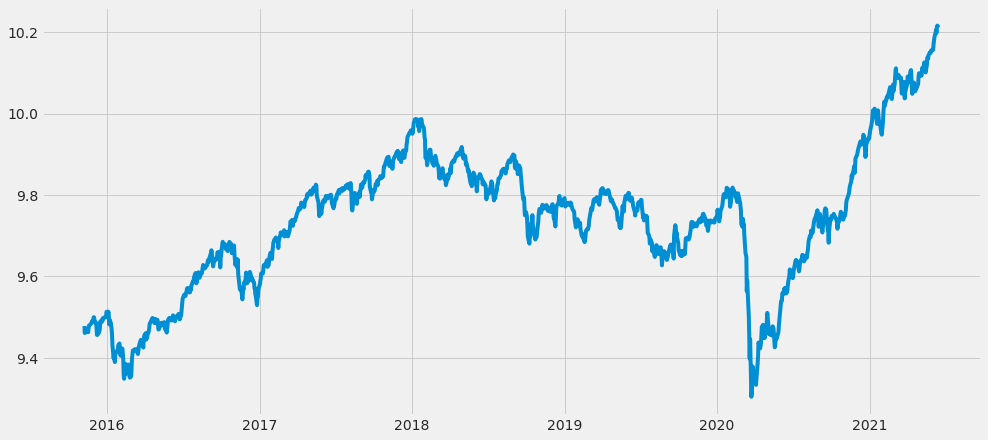

In [ ]:
# null hypothesis says the p-value must very small but we can observe p-value is 0.93

#Estimating trend
df_logScale = np.log(df)
plt.plot(df_logScale)

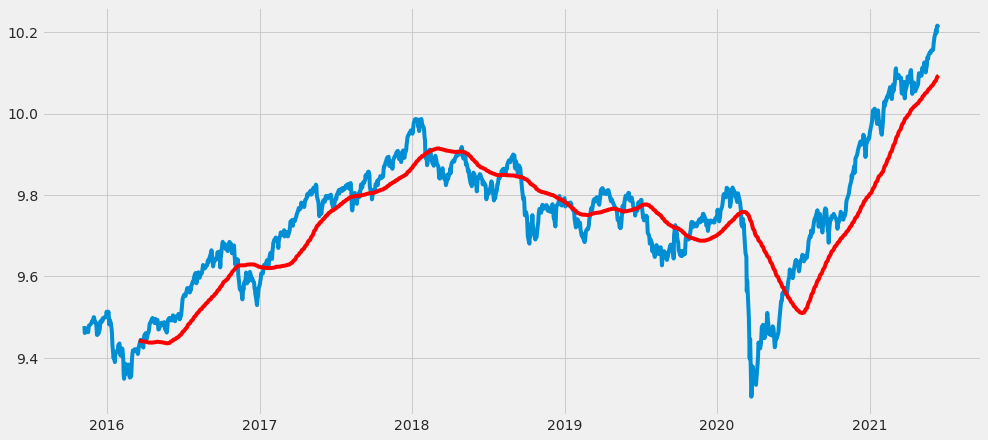

In [ ]:
moving_avg = df_logScale.rolling(window=90).mean()

movingSTD = df_logScale.rolling(window=90).std()

plt.plot(df_logScale)
plt.plot(moving_avg,color = 'red')

In [ ]:
#moving_avg is better then preveous one but still close data are not statinary

#nest take diffrennce between moving avrage and actual close 

df_logMinusmoving_avg = df_logScale - moving_avg
df_logMinusmoving_avg

,Close
Date,
2015-11-09,nan
2015-11-10,nan
2015-11-11,nan
2015-11-13,nan
2015-11-16,nan
...,...
2021-06-08,0.12
2021-06-09,0.11
2021-06-10,0.13


In [ ]:
#removing Nan values 
df_logMinusmoving_avg.dropna(inplace=True)
df_logMinusmoving_avg

,Close
Date,
2016-03-18,-0.02
2016-03-21,-0.00
2016-03-22,-0.00
2016-03-23,0.00
2016-03-28,-0.01
...,...
2021-06-08,0.12
2021-06-09,0.11
2021-06-10,0.13


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determing rolling statistics
    moving_avg = timeseries.rolling(window=90).mean()
    movingSTD  = timeseries.rolling(window=90).std()

    #plot rolling 
    orignal = plt.plot(timeseries,color='blue',label ='original')
    mean = plt.plot(moving_avg,color='red',label ='Rolling mean')
    std = plt.plot(movingSTD, color='black',label ='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block = False)

        #perform Dickey-Fuller test:
    print('Result of Dickey-fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Obeservation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key] = value

    print(dfoutput)



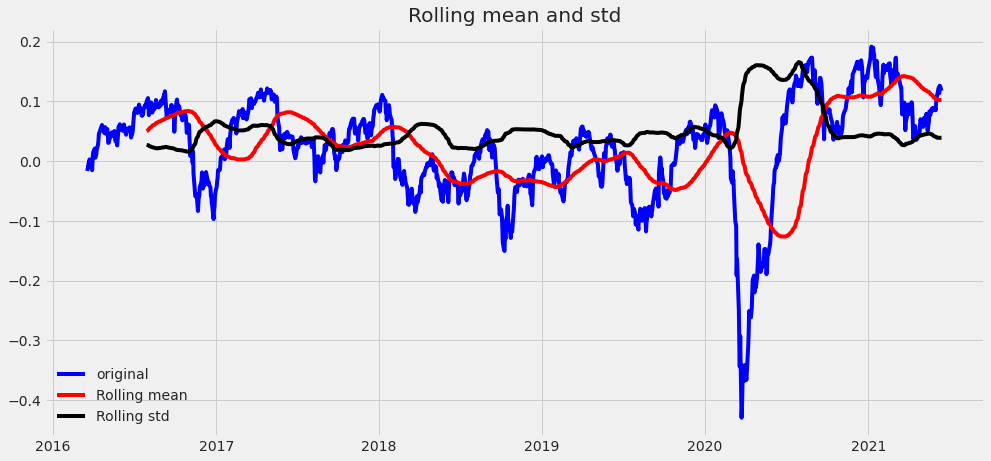

Result of Dickey-fuller test:
Test Statistic                  -3.66
p-value                          0.00
#Lags Used                      14.00
Number of Obeservation used   1279.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


In [ ]:
test_stationarity(df_logMinusmoving_avg['Close'])

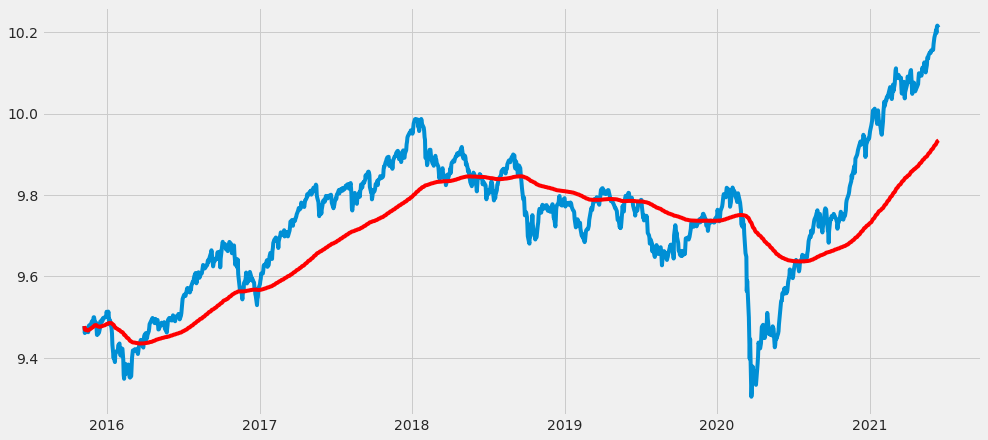

In [ ]:
exponentialDecayWighted_avg = df_logScale.ewm(halflife=90,min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWighted_avg, color='red')


In [ ]:
df_logScale

,Close
Date,
2015-11-09,9.48
2015-11-10,9.46
2015-11-11,9.47
2015-11-13,9.46
2015-11-16,9.46
...,...
2021-06-08,10.21
2021-06-09,10.20
2021-06-10,10.21


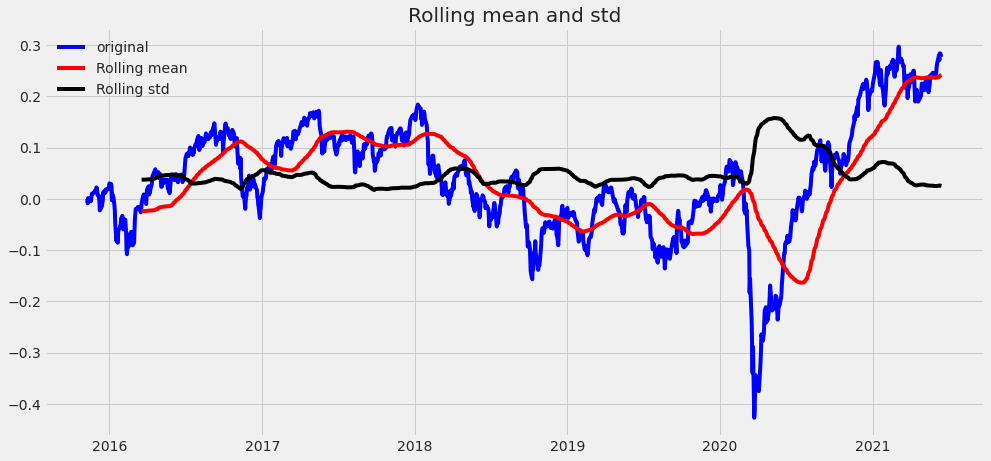

Result of Dickey-fuller test:
Test Statistic                  -2.19
p-value                          0.21
#Lags Used                      14.00
Number of Obeservation used   1368.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


In [ ]:
df_logscaleMinusMovingExponential_avg = df_logScale - exponentialDecayWighted_avg

test_stationarity(df_logscaleMinusMovingExponential_avg['Close'])

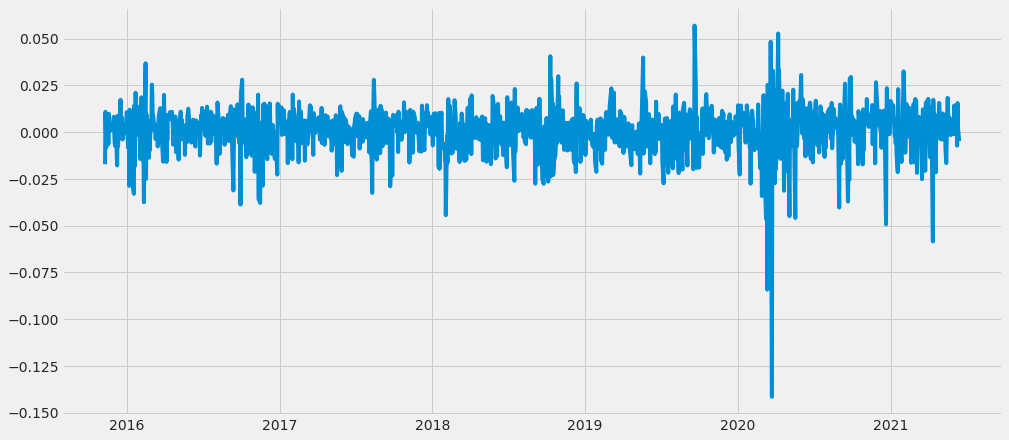

In [ ]:
df_logDiff_shifting = df_logScale - df_logScale.shift()
plt.plot(df_logDiff_shifting)

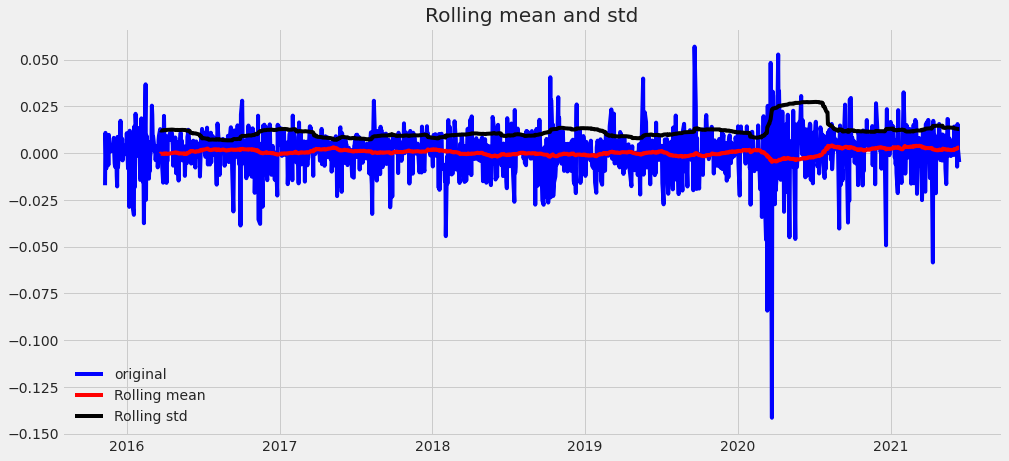

Result of Dickey-fuller test:
Test Statistic                  -9.36
p-value                          0.00
#Lags Used                      13.00
Number of Obeservation used   1368.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


In [ ]:
df_logDiff_shifting.dropna(inplace = True)
test_stationarity(df_logDiff_shifting['Close']) 

In [ ]:
#this shows statinary data 
# the mean line and std line, varinnce are constant over a period 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import statsmodels.api as sm

In [ ]:
df_logScale.info

<bound method DataFrame.info of             Close
Date             
2015-11-09   9.48
2015-11-10   9.46
2015-11-11   9.47
2015-11-13   9.46
2015-11-16   9.46
...           ...
2021-06-08  10.21
2021-06-09  10.20
2021-06-10  10.21
2021-06-11  10.22
2021-06-14  10.21

[1383 rows x 1 columns]>

In [ ]:
df.head()

,Close
Date,
2015-11-09,13073.80
2015-11-10,12851.25
2015-11-11,12991.45
2015-11-13,12885.95
2015-11-16,12883.85


In [ ]:
q = df['Close']
q

Date
2015-11-09   13073.80
2015-11-10   12851.25
2015-11-11   12991.45
2015-11-13   12885.95
2015-11-16   12883.85
               ...   
2021-06-08   27042.80
2021-06-09   26847.80
2021-06-10   27268.45
2021-06-11   27329.15
2021-06-14   27198.50
Name: Close, Length: 1383, dtype: float64

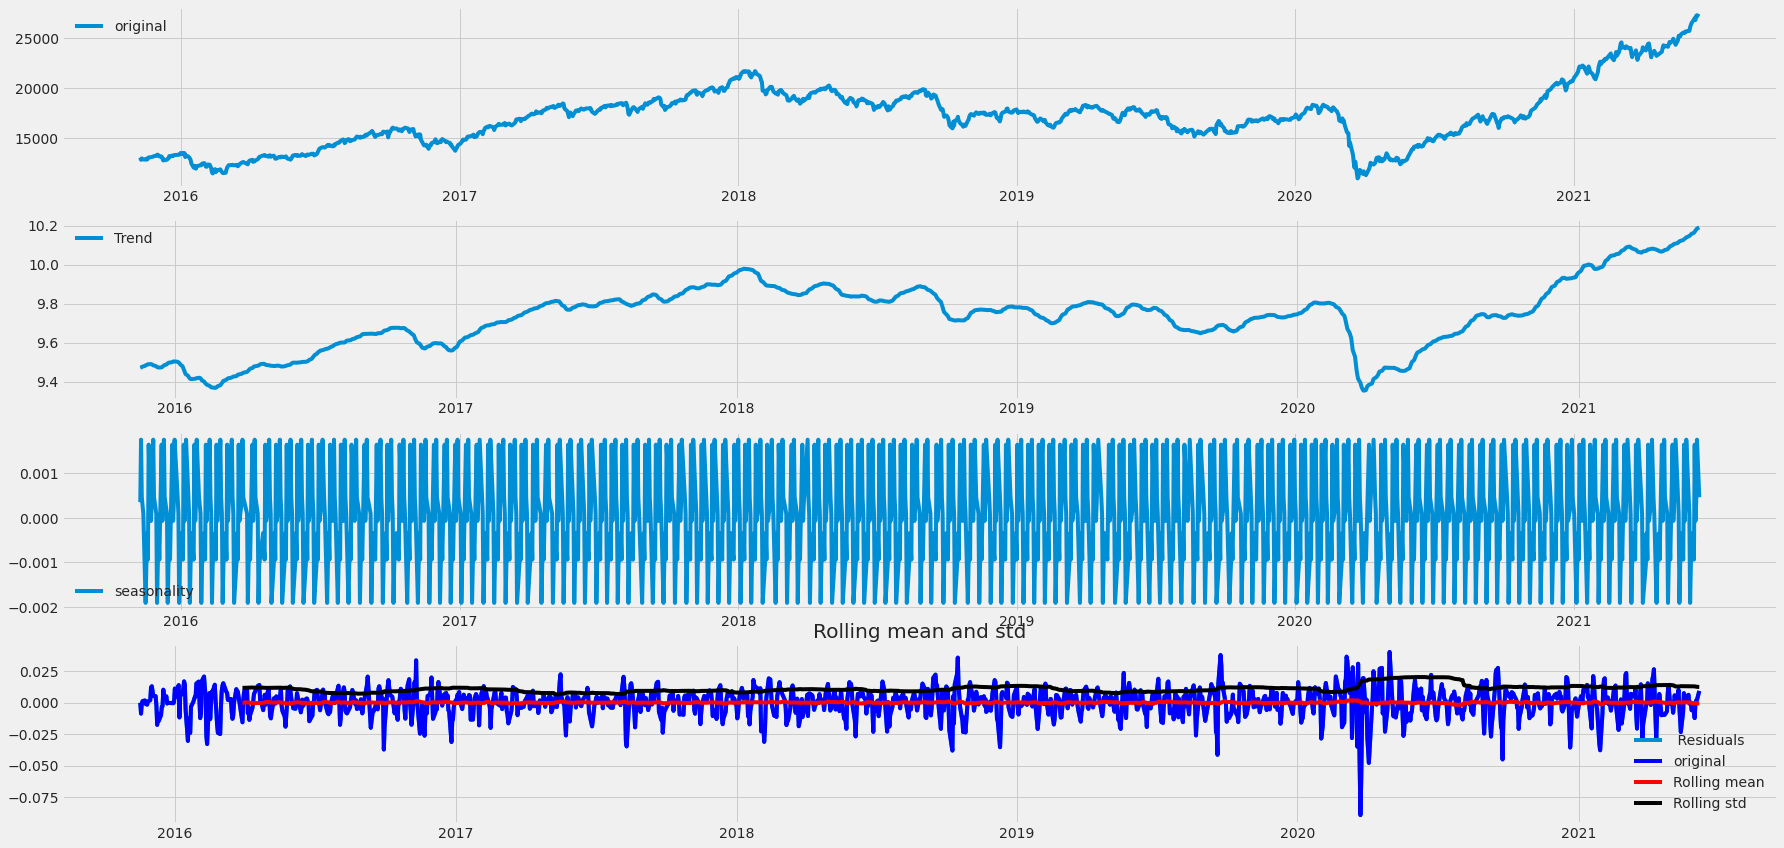

Result of Dickey-fuller test:
Test Statistic                 -12.46
p-value                          0.00
#Lags Used                      18.00
Number of Obeservation used   1354.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


In [ ]:

#decomposition = seasonal_decompose(df_logScale)
decomposition = sm.tsa.seasonal_decompose(df_logScale,freq=10) # model = 'additive'

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(25,12))
plt.subplot(411)
plt.plot(df, label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = ' Residuals')
plt.legend(loc= 'best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData['Close'])


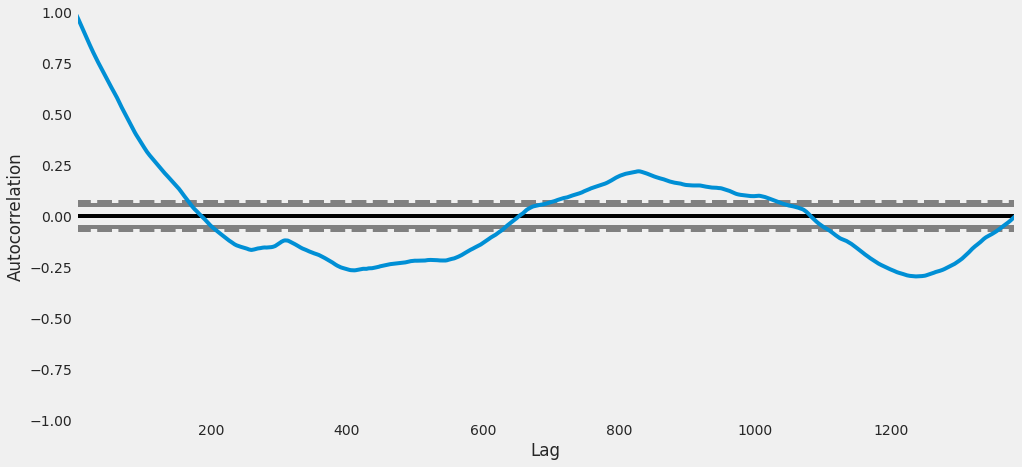

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_logScale) 

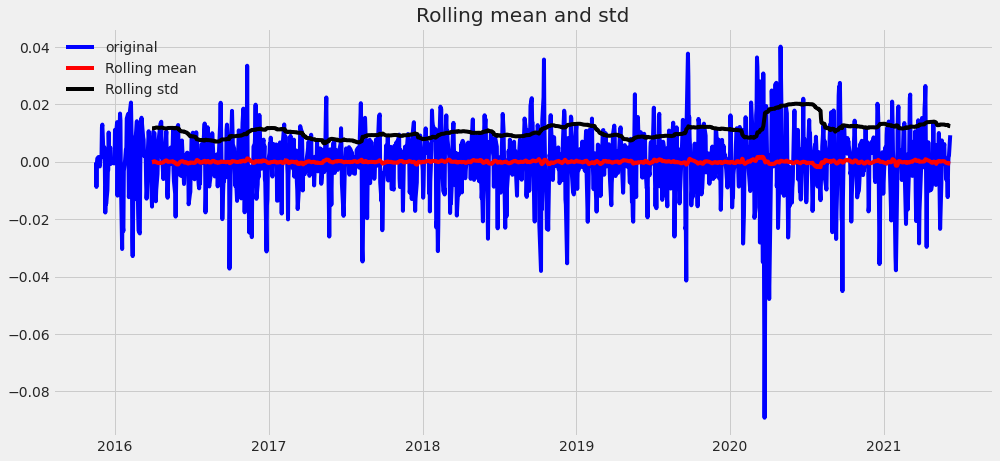

Result of Dickey-fuller test:
Test Statistic                 -12.46
p-value                          0.00
#Lags Used                      18.00
Number of Obeservation used   1354.00
Critical Values (1%)            -3.44
Critical Values (5%)            -2.86
Critical Values (10%)           -2.57
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData['Close'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

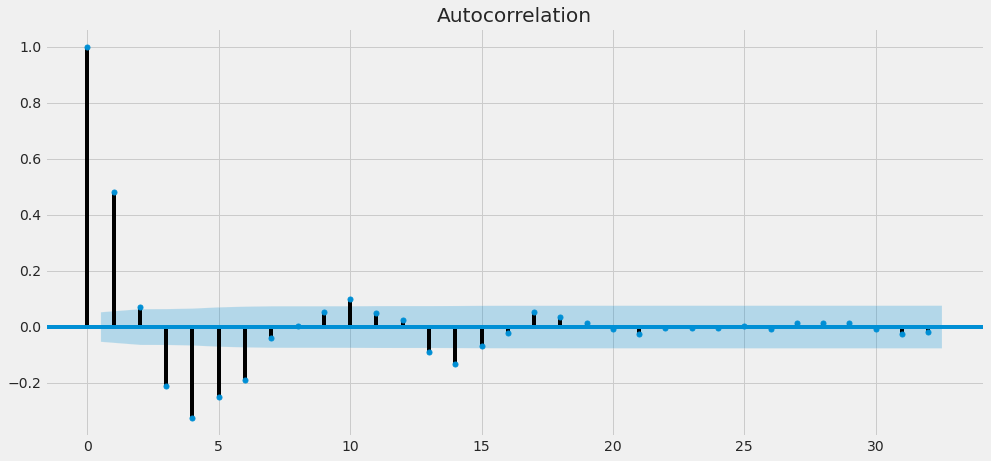

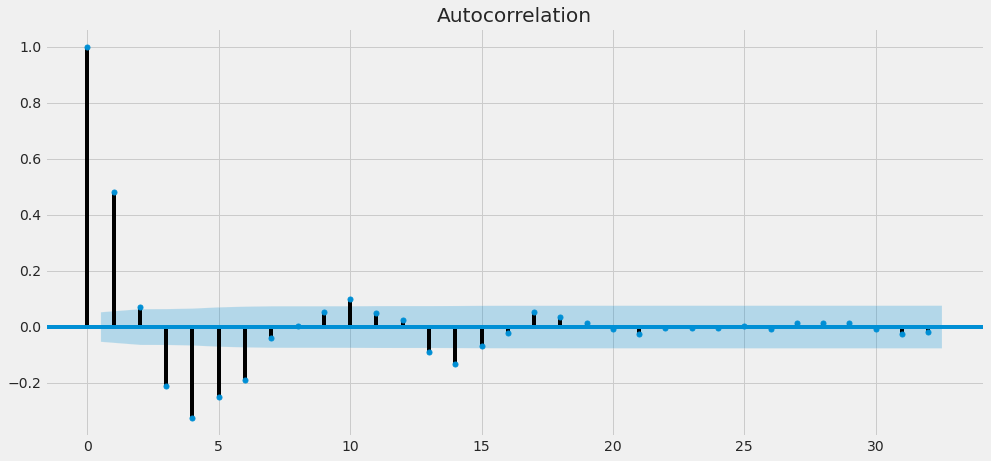

In [ ]:
plot_acf(decomposedLogData)

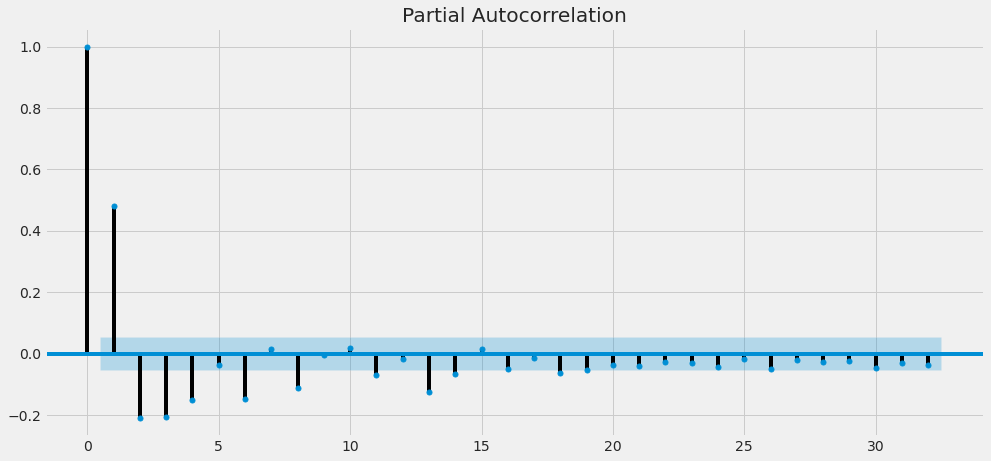

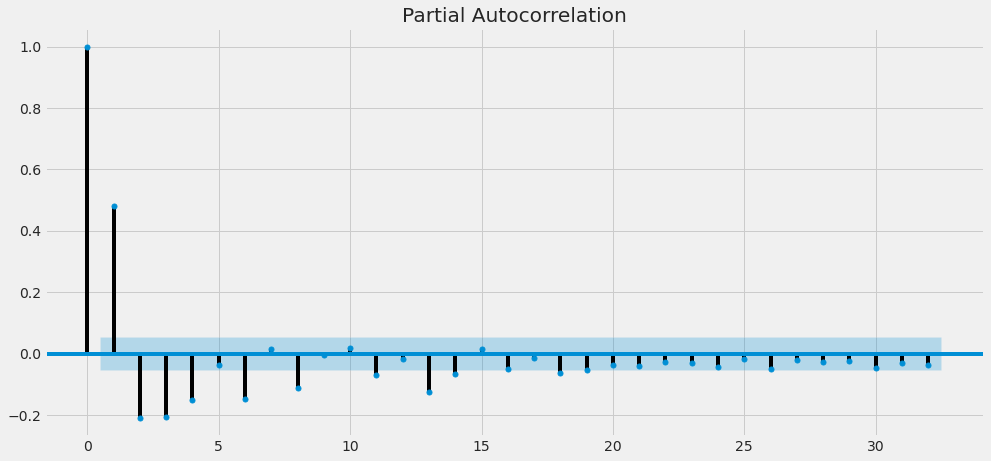

In [ ]:
plot_pacf(decomposedLogData)

plotting AR Model for you


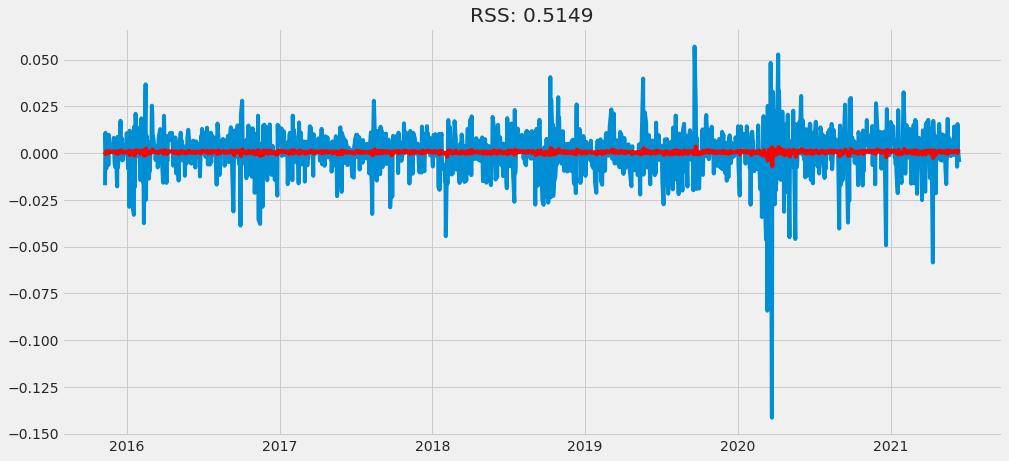

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(df_logScale, order=(1,1,0))
result_AR = model.fit(disp=-1)
plt.plot(df_logDiff_shifting)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_AR.fittedvalues - df_logDiff_shifting['Close']**2))
print('plotting AR Model for you')

In [ ]:
df_logDiff_shifting

,Close
Date,
2015-11-10,-0.02
2015-11-11,0.01
2015-11-13,-0.01
2015-11-16,-0.00
2015-11-17,0.01
...,...
2021-06-08,0.01
2021-06-09,-0.01
2021-06-10,0.02


In [ ]:
df_logDiff_shifting

,Close
Date,
2015-11-10,-0.02
2015-11-11,0.01
2015-11-13,-0.01
2015-11-16,-0.00
2015-11-17,0.01
...,...
2021-06-08,0.01
2021-06-09,-0.01
2021-06-10,0.02


plotting MA Model for you


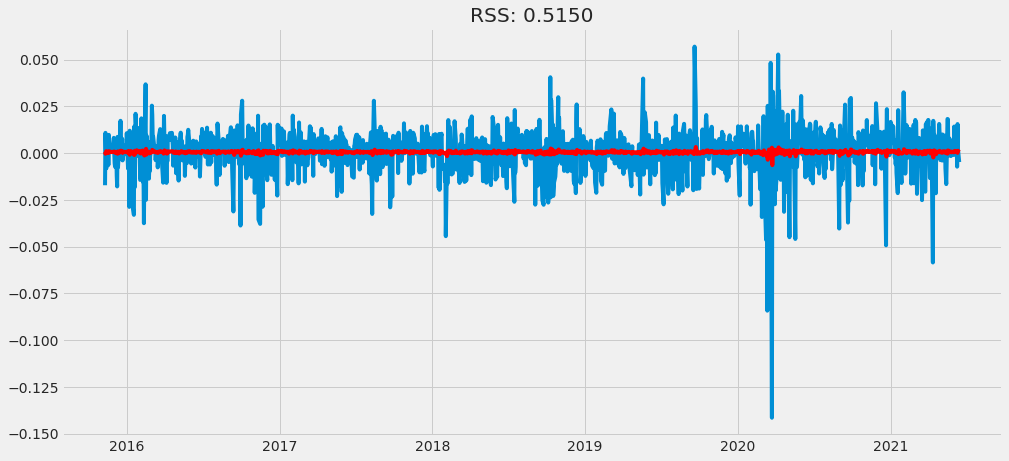

In [ ]:
#MA model
model = ARIMA(df_logScale, order=(0,1,1))
result_MA = model.fit()
plt.plot(df_logDiff_shifting)
plt.plot(result_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_MA.fittedvalues - df_logDiff_shifting['Close']**2))
print('plotting MA Model for you')

plotting MA Model for you


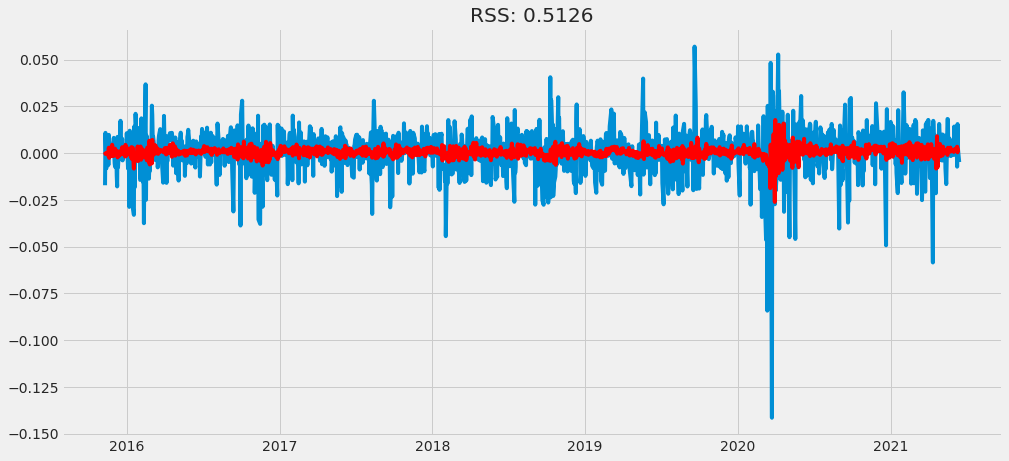

In [ ]:
#MA model
model = ARIMA(df_logScale, order=(4,1,5))
result_ARIMA = model.fit()
plt.plot(df_logDiff_shifting)
plt.plot(result_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_ARIMA.fittedvalues - df_logDiff_shifting['Close']**2))
print('plotting MA Model for you')

In [ ]:
result_ARIMA.fittedvalues

Date
2015-11-10    0.00
2015-11-11   -0.00
2015-11-13    0.00
2015-11-16    0.00
2015-11-17    0.00
              ... 
2021-06-08    0.00
2021-06-09    0.00
2021-06-10    0.00
2021-06-11    0.00
2021-06-14    0.00
Length: 1382, dtype: float64

In [ ]:
# converting time series data of prediction using ARIMA
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff)

Date
2015-11-10    0.00
2015-11-11   -0.00
2015-11-13    0.00
2015-11-16    0.00
2015-11-17    0.00
              ... 
2021-06-08    0.00
2021-06-09    0.00
2021-06-10    0.00
2021-06-11    0.00
2021-06-14    0.00
Length: 1382, dtype: float64


In [ ]:
#convert to cumulative sum
prediction_ARIMA_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_cumsum.head())

Date
2015-11-10   0.00
2015-11-11   0.00
2015-11-13   0.00
2015-11-16   0.00
2015-11-17   0.00
dtype: float64


In [ ]:
# data scaled to cumulative sum 
prediction_ARIMA_log = pd.Series(df_logScale['Close'].iloc[0], index = df_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_cumsum, fill_value = 0)
prediction_ARIMA_log.head()

Date
2015-11-09   9.48
2015-11-10   9.48
2015-11-11   9.48
2015-11-13   9.48
2015-11-16   9.48
dtype: float64

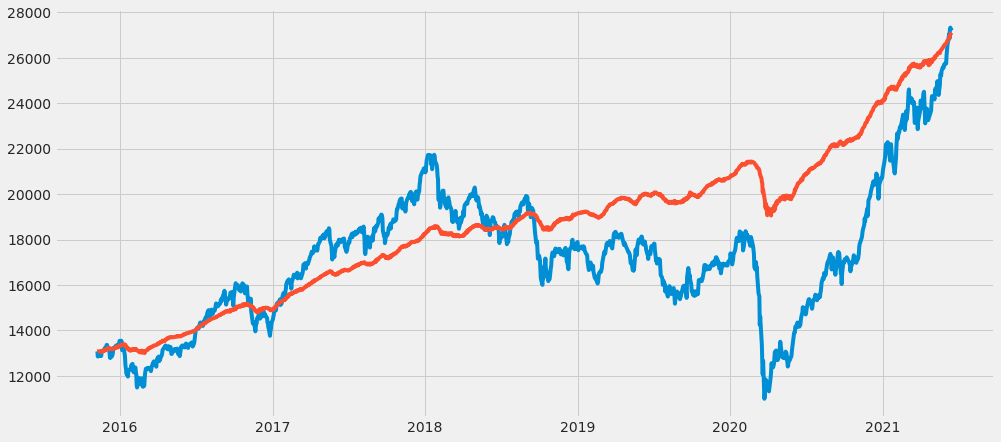

In [ ]:
# transform the result by taking exponential because we have log data before 
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df)
plt.plot(prediction_ARIMA)

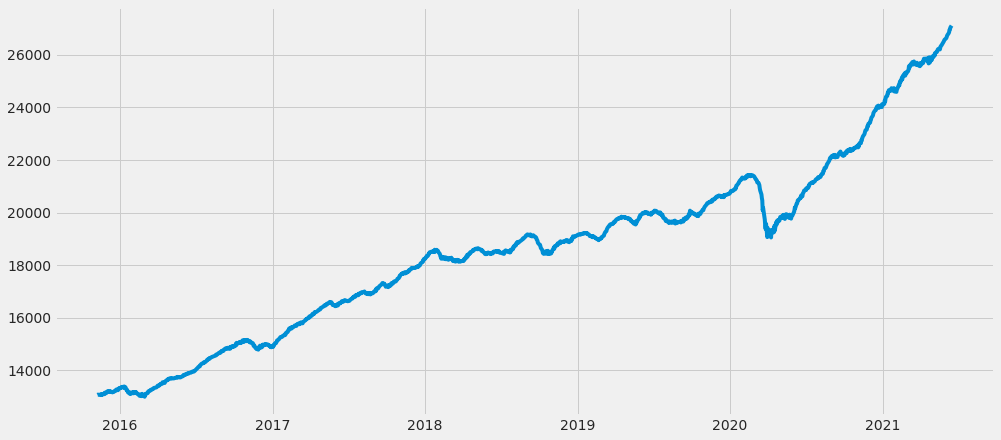

In [ ]:
plt.plot(prediction_ARIMA)

In [ ]:
df_logScale

,Close
Date,
2015-11-09,9.48
2015-11-10,9.46
2015-11-11,9.47
2015-11-13,9.46
2015-11-16,9.46
...,...
2021-06-08,10.21
2021-06-09,10.20
2021-06-10,10.21


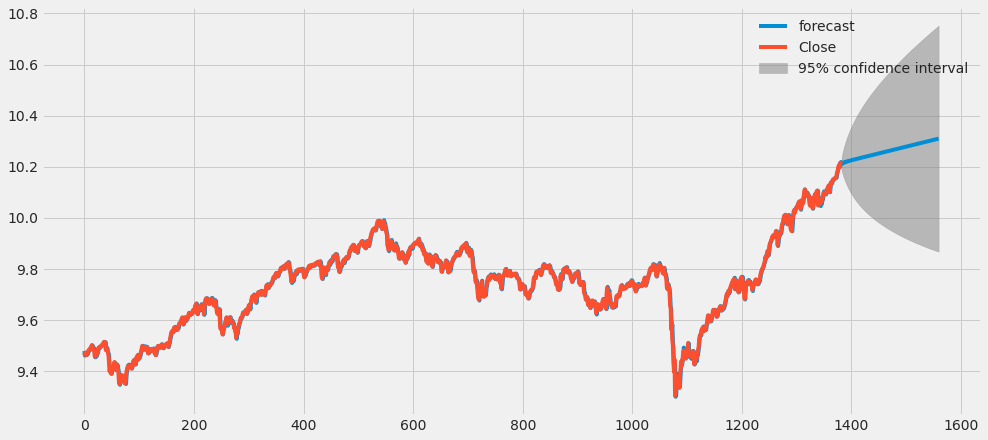

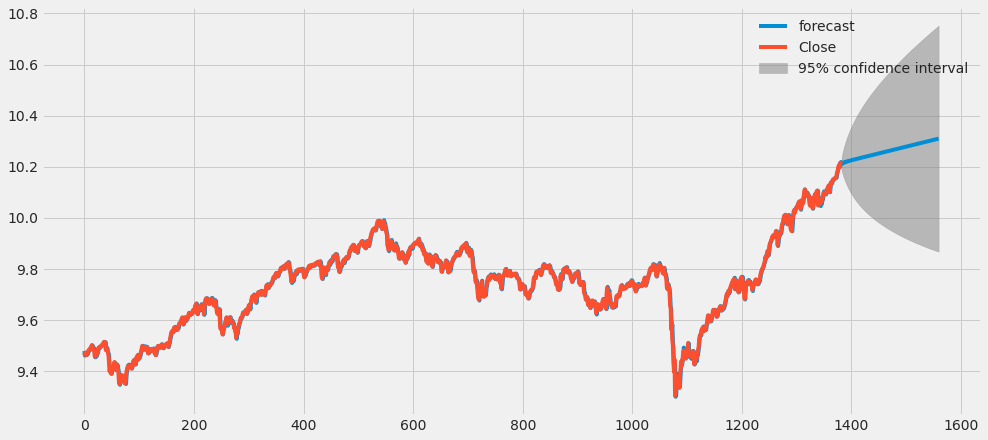

In [ ]:
#plt.plot(train, color = 'red')
#plt.plot(test , color = 'green')
result_ARIMA.plot_predict(1,1560)


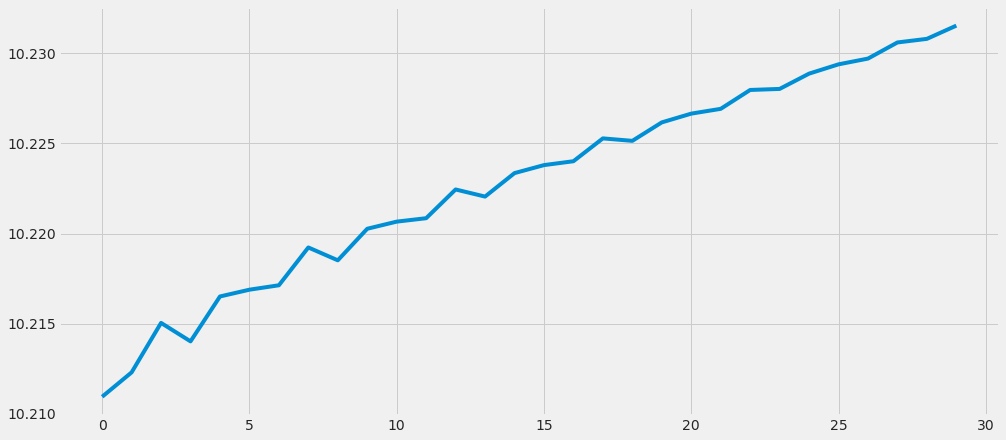

In [ ]:
df_predection_30DAYS = result_ARIMA.forecast(steps = 30)[0]
plt.plot(df_predection_30DAYS)

In [ ]:
# understand train test split in time series data

train_size = int(len(df_logScale) * 0.66)
test_size = len(df_logScale) - train_size
